# RAO3 Algorithm

Name : Dawwi Raissa Damarjati Muljana
SID : 1301213517

# Kode

In [1]:
#importing
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Fungsi F14 

In [2]:
def F14(x):
    aS = np.array([
        [-32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32],
        [-32, -32, -32, -32, -32, -16, -16, -16, -16, -16, 0, 0, 0, 0, 0, 16, 16, 16, 16, 16, 32, 32, 32, 32, 32]
    ])
    bS = np.sum((x[:, np.newaxis] - aS) ** 6, axis=0)
    return (1 / 500 + np.sum(1 / (np.arange(1, 26) + bS))) ** -1

# Function details and plot function
def get_function_details(F):
    if F == 'F14':
        fobj = F14
        lb = -65.536
        ub = 65.536
        dim = 2
        return lb, ub, dim, fobj
    else:
        raise ValueError('Function not defined')

def func_plot(func_name, color):
    lb, ub, dim, fobj = get_function_details(func_name)
    
    if func_name == 'F14':
        x = np.arange(-50, 100, 2)
        y = x
    else:
        raise ValueError('Function not defined for plotting')
    
    X, Y = np.meshgrid(x, y)
    Z = np.array([fobj(np.array([xi, yi])) for xi, yi in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=color, edgecolor='none')
    plt.colorbar(surf)
    plt.show()

# RAO3 Alogrithm

In [3]:
def RAO3(pop_size, iterations, bounds, fobj):
    # Initialize population
    population = np.random.uniform(bounds[0], bounds[1], (pop_size, 2))
    best_sol = population[np.argmin([fobj(ind) for ind in population])]
    worst_sol = population[np.argmax([fobj(ind) for ind in population])]
    
    history = [population.copy()]
    
    for _ in range(iterations):
        for j in range(pop_size):
            r1 = np.random.random(2)
            r2 = np.random.random(2)
            
            new_sol = population[j] + r1 * (best_sol - np.abs(worst_sol)) + r2 * (population[j] - population[np.random.randint(pop_size)])
            new_sol = np.clip(new_sol, bounds[0], bounds[1])
            
            if fobj(new_sol) < fobj(population[j]):
                population[j] = new_sol
                
        best_sol = population[np.argmin([fobj(ind) for ind in population])]
        worst_sol = population[np.argmax([fobj(ind) for ind in population])]
        history.append(population.copy())
    
    return history, best_sol

# Parameters

In [4]:
pop_size = 25
iterations = 100
bounds = [-50, 100]

# Run RAO3

In [5]:
history, best_solution = RAO3(pop_size, iterations, bounds, F14)

# Plotting solution space

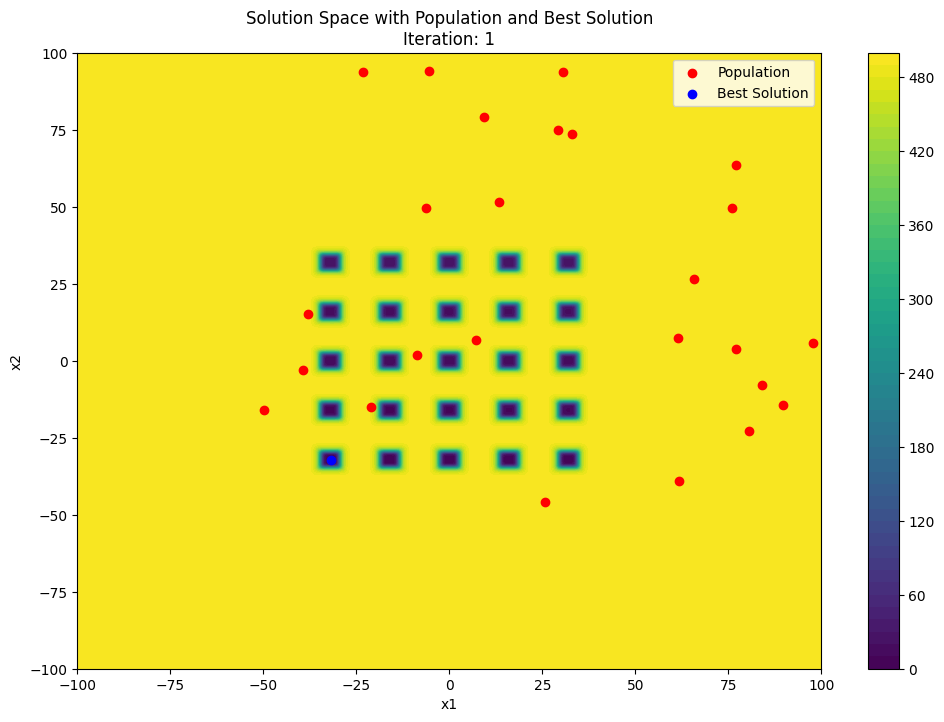

In [6]:
x = np.linspace(-100, 100, 600)
y = np.linspace(-100, 100, 600)
X, Y = np.meshgrid(x, y)
Z = np.array([[F14(np.array([i, j])) for i, j in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])

fig, ax = plt.subplots(figsize=(12, 8))
cp = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(cp)

def update(frame):
    ax.clear()
    cp = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
    ax.scatter(history[frame][:, 0], history[frame][:, 1], c='red', label='Population')
    ax.scatter(best_solution[0], best_solution[1], c='blue', label='Best Solution')
    ax.legend()
    ax.set_xlim([-100, 100])  # Set x-axis limits
    ax.set_ylim([-100, 100])  # Set y-axis limits
    ax.set_title(f'Solution Space with Population and Best Solution\nIteration: {frame + 1}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

ani = FuncAnimation(fig, update, frames=iterations, repeat=False)


# Saving GIF

In [7]:
# Manage run count
run_count_file = 'run_count.txt'

# Read current run count
try:
    with open(run_count_file, 'r') as f:
        run_count = int(f.read().strip())
except FileNotFoundError:
    run_count = 0

# Increment run count
run_count += 1

# Save new run count
with open(run_count_file, 'w') as f:
    f.write(str(run_count))

# Save the animation as a GIF with incremented name
gif_filename = f'RAO3-Gen2.{run_count}.gif'
ani.save(gif_filename, writer=PillowWriter(fps=5))

plt.show()